<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://cdn.miami.edu/_assets-common/images/system/um-logo-gray-bg.png" alt="Miami Logo" style="height: 98px;">
</div>

<h1>MPO 624: A multivariate dataset on ENSO</h1>
  
<i> Last edited: February 2020</i>

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# load file
data = xr.open_dataset('../data/Eq_timelon_sections.nc',decode_times=False)
print(data)

<xarray.Dataset>
Dimensions:  (lon: 144, time: 240)
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
  * time     (time) float32 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
Data variables:
    olr      (time, lon) float32 ...
    precip   (time, lon) float32 ...
    slp      (time, lon) float32 ...
    sst      (time, lon) float32 ...
    uwnd     (time, lon) float32 ...


In [3]:
# load variable data from file
sst=data.sst
olr=data.olr
lon=data.lon
time=data.time
print(sst.shape,lon.shape,time.shape)

(240, 144) (144,) (240,)


### Can you find the El Ninos and La Ninas?

In [4]:
sst_anom = sst - sst.mean(dim='time')
print(sst_anom)

<xarray.DataArray 'sst' (time: 240, lon: 144)>
array([[ 0.871584,  1.160555,  1.139643, ...,  1.070618,  1.048704,  0.931259],
       [ 1.597586,  1.673555,  1.571642, ...,  1.427618,  1.623203,  1.60726 ],
       [ 2.129082,  1.866554,  1.592142, ...,  2.130619,  2.267202,  2.278259],
       ...,
       [-1.402914, -1.244444, -0.942858, ..., -1.213383, -1.546295, -1.474739],
       [-0.463413, -0.350445, -0.261862, ..., -0.72138 , -0.643795, -0.547743],
       [ 0.103588,  0.168556,  0.238642, ..., -0.072382,  0.094706,  0.156261]],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
  * time     (time) float32 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...


In [5]:
# what does the time array look like?
print(time)

<xarray.DataArray 'time' (time: 240)>
array([  1.,   2.,   3., ..., 238., 239., 240.], dtype=float32)
Coordinates:
  * time     (time) float32 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
Attributes:
    axis:       Y
    units:      months since 1982-01-01 00:00:00
    delta_t:    0000-01-00 00:00:00
    long_name:  Time


In [6]:
year_ticks = []
year=1982
for t in (time):
    if ((t-1) % 12 == 0): 
        year_ticks.append(str(year))
        year+=1
    #else:
    #    year_ticks.append('')
        
print(year_ticks,len(year_ticks))

['1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001'] 20


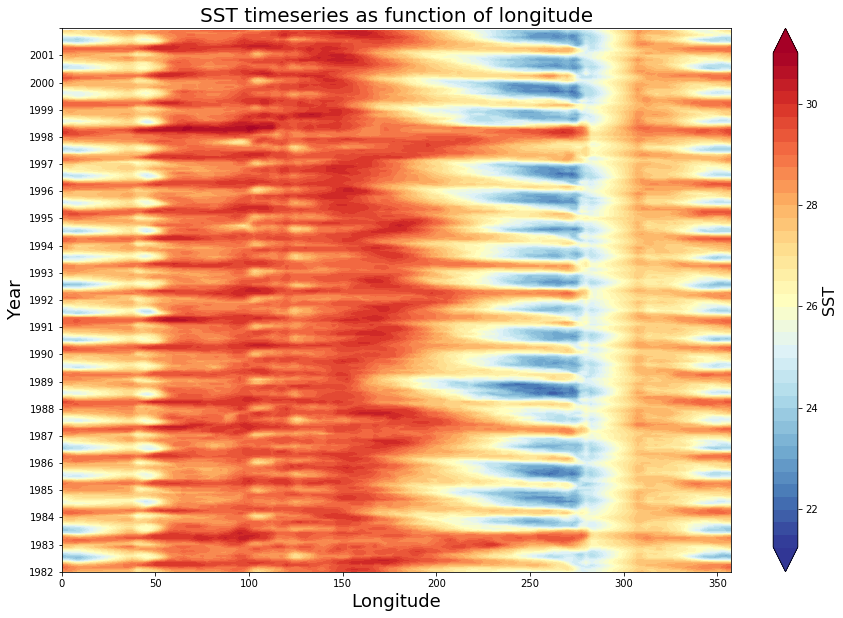

In [7]:
# plot timeseries of SST 
fig=plt.figure(figsize=[15,10])
ax=fig.add_subplot(111)
cs = ax.contourf(lon,time,sst,40,cmap='RdYlBu_r',extend='both')
cb = plt.colorbar(cs,ticks=np.arange(20,30+2,2))
cb.set_label('SST',fontsize=16)
ax.set_yticks(np.arange(1,240+12,12))
ax.set_yticklabels(year_ticks)
ax.set_title('SST timeseries as function of longitude',fontsize=20)
ax.set_ylabel('Year',fontsize=18)
ax.set_xlabel('Longitude',fontsize=18)
plt.show()

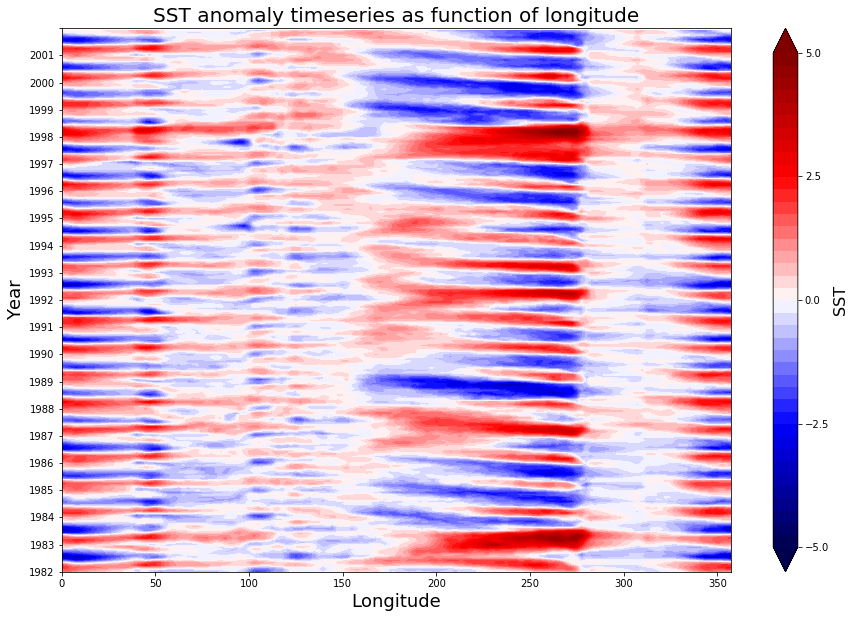

In [8]:
# plot timeseries of SST anomalies
fig=plt.figure(figsize=[15,10])
ax=fig.add_subplot(111)
cs = ax.contourf(lon,time,sst_anom,np.arange(-5,5+.25,.25),cmap='seismic',extend='both')
cb = plt.colorbar(cs,ticks=np.linspace(-5,5,5))
cb.set_label('SST',fontsize=16)
ax.set_yticks(np.arange(1,240+12,12))
ax.set_yticklabels(year_ticks)
ax.set_title('SST anomaly timeseries as function of longitude',fontsize=20)
ax.set_ylabel('Year',fontsize=18)
ax.set_xlabel('Longitude',fontsize=18)
plt.show()

### Covariance matrix vs correlation matrix

In [9]:
cormat = np.corrcoef( np.transpose(sst_anom.values) )
covmat = np.cov( np.transpose(sst_anom.values) )
print(cormat.shape,covmat.shape)

(144, 144) (144, 144)


Text(0.5,1,'SST Anomaly Covariance Matrix')

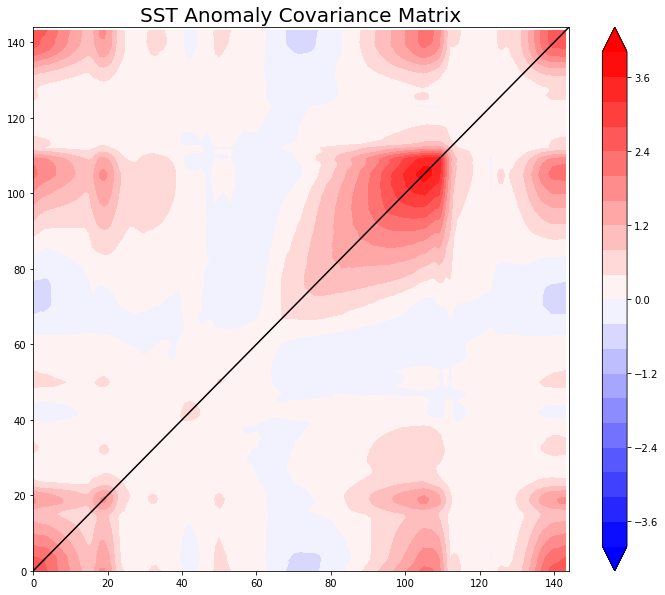

In [10]:
# covariance matrix
fig=plt.figure(figsize=[12,10])
ax=fig.add_subplot(111)
cs = ax.contourf(covmat,np.arange(-4,4+.4,.4),cmap='bwr',extend='both')
ax.plot([0,len(lon)],[0,len(lon)],'k')
ax.set_xlim([0,len(lon)])
ax.set_ylim([0,len(lon)])
plt.colorbar(cs)
ax.set_title('SST Anomaly Covariance Matrix',fontsize=20)

Text(0.5,1,'SST Correlation Matrix')

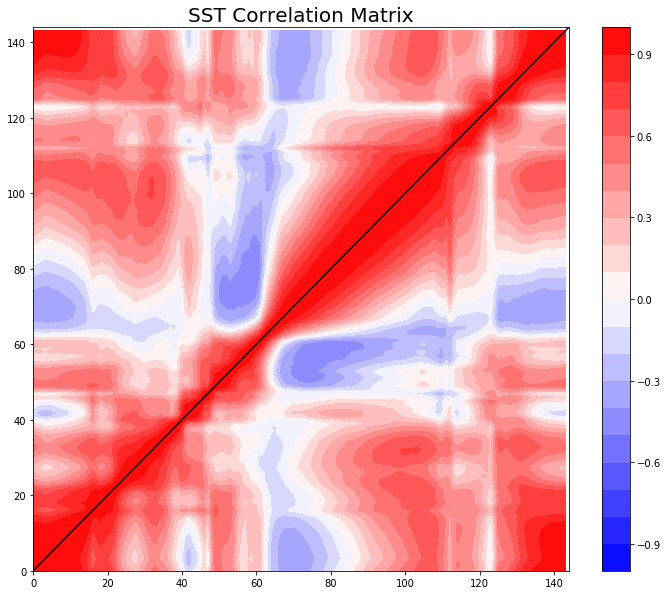

In [11]:
# correlation matrix
fig=plt.figure(figsize=[12,10])
ax=fig.add_subplot(111)
cs = ax.contourf(cormat,np.arange(-1,1+.1,.1),cmap='bwr')
ax.plot([0,len(lon)],[0,len(lon)],'k')
ax.set_xlim([0,len(lon)])
ax.set_ylim([0,len(lon)])
plt.colorbar(cs)
ax.set_title('SST Correlation Matrix',fontsize=20)

### Dividing into longitudinal chucks

Need to find a meaningful separation...
<br>
![alt text](http://www.compassdude.com/i/lat-lon-coordinate.gif "lon grid")

<br>
Let's try splitting up the ocean basins.


In [12]:
Pac_lon_bnds, Atl_lon_bnds, Ind_lon_bnds = [150,360-90],[360-90,30],[30,150] 
print(Pac_lon_bnds[1]-Pac_lon_bnds[0],(360-Atl_lon_bnds[0])+Atl_lon_bnds[1],Ind_lon_bnds[1]-Ind_lon_bnds[0])

120 120 120


In [28]:
# slice according to longitude 
Pac_sst_anom = sst_anom.sel(lon=slice(*Pac_lon_bnds))
Atl_sst_anom = sst_anom.sel(lon=(lon >= Atl_lon_bnds[0]) | (lon <= Atl_lon_bnds[1]))
Ind_sst_anom = sst_anom.sel(lon=slice(*Ind_lon_bnds))
print(Pac_sst_anom.shape,Atl_sst_anom.shape,Ind_sst_anom.shape)

(240, 49) (240, 49) (240, 49)


In [29]:
# or use ravel(), this looks rather manual

Pac_sst_anom = Pac_sst_anom.values.reshape(Pac_sst_anom.shape[0]*Pac_sst_anom.shape[1])
Atl_sst_anom = Atl_sst_anom.values.reshape(Atl_sst_anom.shape[0]*Atl_sst_anom.shape[1])
Ind_sst_anom = Ind_sst_anom.values.reshape(Ind_sst_anom.shape[0]*Ind_sst_anom.shape[1])
print(Pac_sst_anom.shape,Atl_sst_anom.shape,Ind_sst_anom.shape)

(11760,) (11760,) (11760,)


### Different Scatterplots using seaborn
Seaborn and pandas take a while. 😴

In [15]:
d = {'Pacific': Pac_sst_anom, 'Atlantic': Atl_sst_anom, 'Indian': Ind_sst_anom}
df = pd.DataFrame(d,dtype=float)
print(df.shape)

(11760, 3)


In [22]:
lon

<xarray.DataArray 'lon' (lon: 144)>
array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,  22.5,
        25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,  45. ,  47.5,
        50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,  67.5,  70. ,  72.5,
        75. ,  77.5,  80. ,  82.5,  85. ,  87.5,  90. ,  92.5,  95. ,  97.5,
       100. , 102.5, 105. , 107.5, 110. , 112.5, 115. , 117.5, 120. , 122.5,
       125. , 127.5, 130. , 132.5, 135. , 137.5, 140. , 142.5, 145. , 147.5,
       150. , 152.5, 155. , 157.5, 160. , 162.5, 165. , 167.5, 170. , 172.5,
       175. , 177.5, 180. , 182.5, 185. , 187.5, 190. , 192.5, 195. , 197.5,
       200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. , 222.5,
       225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5, 245. , 247.5,
       250. , 252.5, 255. , 257.5, 260. , 262.5, 265. , 267.5, 270. , 272.5,
       275. , 277.5, 280. , 282.5, 285. , 287.5, 290. , 292.5, 295. , 297.5,
       300. , 302.5, 305. , 307.5, 310. 

In [25]:
df

,Pacific,Atlantic,Indian
0,0.236834,0.871584,0.290586
1,0.192392,1.160555,0.247110
2,0.195135,1.139643,0.194963
3,0.195459,0.828196,-0.038395
4,0.130642,0.640154,-0.479918
5,0.256226,0.620932,-0.175024
6,0.258936,0.574116,0.002081
7,0.375042,0.528231,-0.481520
8,0.238979,0.477999,-0.813906
9,-0.053795,0.431538,-0.956478


KeyError: 'lon'

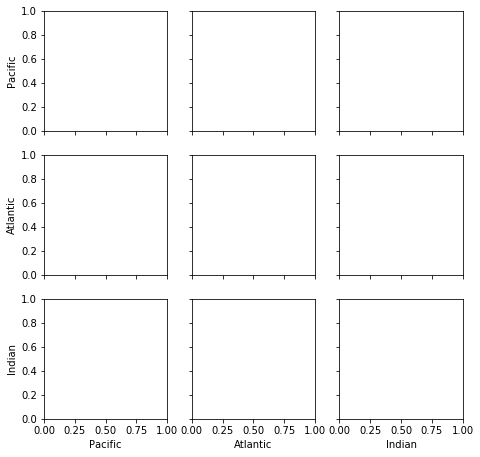

In [26]:
sns.pairplot(df,diag_kind="kde",hue="lon")